In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [15]:
#read data
path="/lustre/ytzheng/"

Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_cold2.6_fxdlhf'

Casename2 = 'ASTEX_cold2.6_240x240'
Casename3 = 'ASTEX_cold2.6_fxdlhf_240x240'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100*.nc',
                      combine = 'by_coords',decode_cf = False)

f2 = xr.open_mfdataset(path + Casename2 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f3 = xr.open_mfdataset(path + Casename3 + '/' + '*N100*.nc',
                      combine = 'by_coords',decode_cf = False)

In [16]:
f1

<xarray.Dataset>
Dimensions:               (time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(90,), me

In [17]:
nt = 70
t_hours = np.arange(nt)
z = f['z']/1000.

f = f.isel(time = slice(0, nt))
f1 = f1.isel(time = slice(0, nt))
f2 = f2.isel(time = slice(0, nt))
f3 = f3.isel(time = slice(0, nt))

myfontsize = 12

In [5]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], xrange = [0., 65.], 
          cbar = False, xlabel = False, ylabel = False, out = False):

    norm = cm.colors.BoundaryNorm(mylevels,256)
    oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels,
                          extend = extend, norm = norm)
    
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

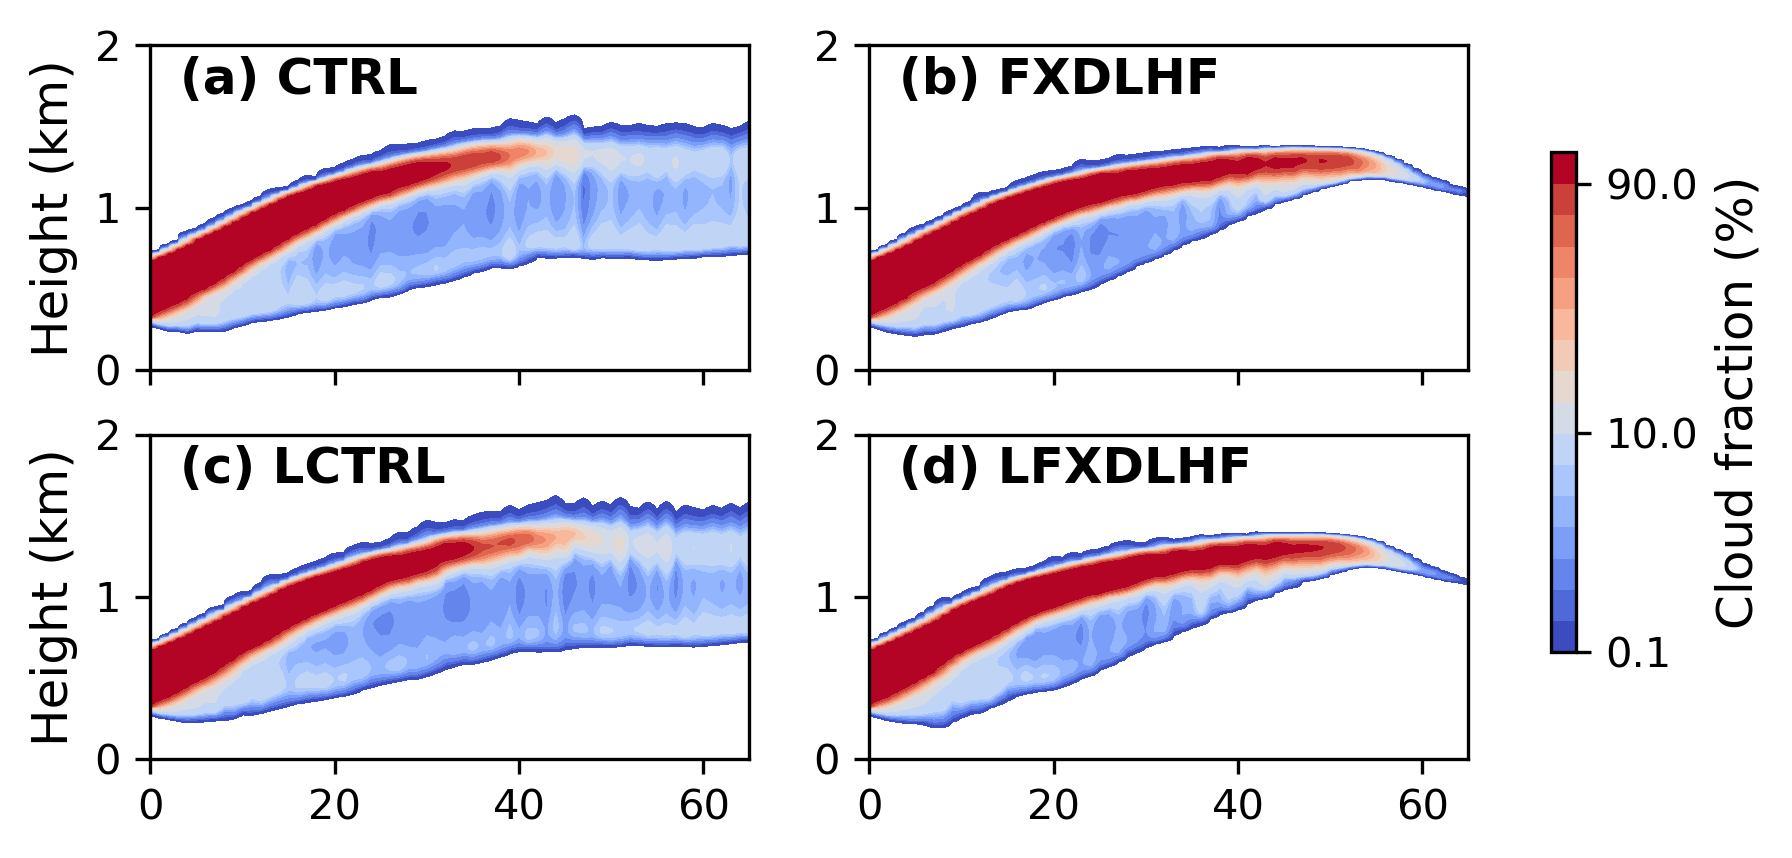

In [28]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 2,
                        sharex = True, sharey = False,
                        figsize=(18/2.54, (8)/2.54), dpi = 300)

mylevels = [0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
oax = plt2D(fig, axs[0,0], t_hours, z, 100.*f['CLD'].T, 'Cloud cover (%)', mycmap=cm.coolwarm, 
      mylevels=mylevels, out = True, ylabel = True)

oax = plt2D(fig, axs[0,1], t_hours, z, 100.*f1['CLD'].T, 'Cloud cover (%)', mycmap=cm.coolwarm, 
      mylevels=mylevels, out = True)

oax = plt2D(fig, axs[1,0], t_hours, z, 100.*f2['CLD'].T, 'Cloud cover (%)', mycmap=cm.coolwarm, 
      mylevels=mylevels, out = True, ylabel = True)

oax = plt2D(fig, axs[1,1], t_hours, z, 100.*f3['CLD'].T, 'Cloud cover (%)', mycmap=cm.coolwarm, 
      mylevels=mylevels, out = True)

# axs[0,0].plot(t_hours, f['LCL']/1000., color = 'black', linestyle = '--')
# axs[0,1].plot(t_hours, f1['LCL']/1000., color = 'black', linestyle = '--')
# axs[1,0].plot(t_hours, f2['LCL']/1000., color = 'black', linestyle = '--')
# axs[1,1].plot(t_hours, f3['LCL']/1000., color = 'black', linestyle = '--')

cbar = fig.colorbar(oax, ax = axs, orientation='vertical', 
                    shrink=0.7, pad = 0.05,ticks = [0.1, 10, 90])
cbar.set_label('Cloud fraction (%)', fontsize=myfontsize)

mylabel = np.array((['(a) CTRL','(b) FXDLHF'],['(c) LCTRL','(d) LFXDLHF']))

for i in range(2):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,
                      fontsize=myfontsize, fontweight='bold')
        
fig.savefig('FigA1_larger_domain.png', dpi=fig.dpi, bbox_inches='tight')